# This dataset consists of tv shows and movies available on Netflix as of 2020. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

In [47]:
# import packages and read the input data

import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [2]:
data.shape

(7787, 12)

In [3]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [4]:
#check the data type of every column

data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

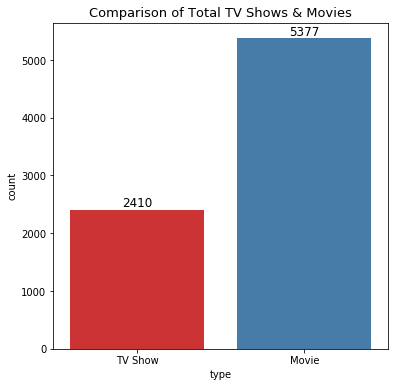

In [48]:
# comparison of TV shows and Movies for all data 
figure = plt.figure(figsize=(6,6))
sns.countplot(x="type",data=data,palette='Set1')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('Comparison of Total TV Shows & Movies',size='13')
plt.show()

In [49]:
# creating dataframe for years 2017 and onwards
netflix2017to2020 = data[data['release_year'] >= 2017]

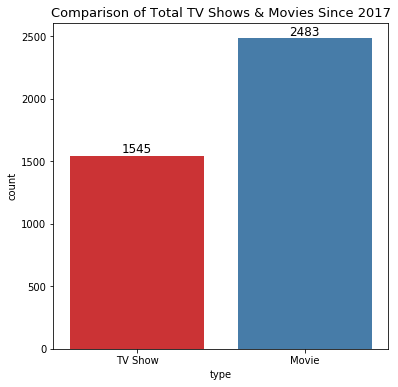

In [50]:
#Comparison of Total TV Shows & Movies Since 2017
figure = plt.figure(figsize=(6,6))
sns.countplot(x="type",data=netflix2017to2020,palette='Set1')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('Comparison of Total TV Shows & Movies Since 2017',size='13')
plt.show()

In [51]:
# creating seprate dataframes for movies and Tvshows
movies = data[data['type'] == 'Movie']
tvshows= data[data['type'] == 'TV Show']

In [53]:
movies.shape

(5377, 12)

In [52]:
tvshows.shape

(2410, 12)

In [11]:
#fetching unique values in release year section
movies["release_year"].unique()

array([2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015, 2020,
       2010, 2005, 2012, 2006, 2013, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       1973, 1967, 1960, 1981, 1958, 1976, 2021, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1942, 1969, 1955, 1963, 1964,
       1954, 1970, 1944, 1947, 1959, 1943])

In [54]:
#creating movies dataframe for years 2010 and onwards
movies2010to2020 = movies[movies["release_year"]  >= 2010]


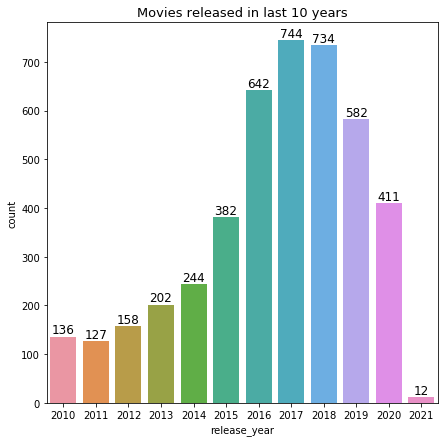

In [55]:
# Movies released in last 10 years 
figure = plt.figure(figsize=(7,7))
sns.countplot(x="release_year",data=movies2010to2020)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('Movies released in last 10 years',size='13')
plt.show()

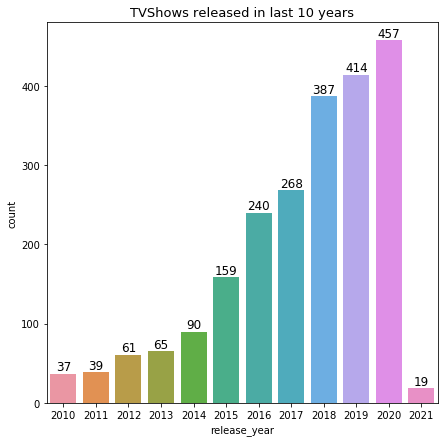

In [56]:
#TVShows released in last 10 years
tvshows2010to2020 = tvshows[tvshows["release_year"]  >= 2010]
figure = plt.figure(figsize=(7,7))
sns.countplot(x="release_year",data=tvshows2010to2020)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('TVShows released in last 10 years',size='13')
plt.show()


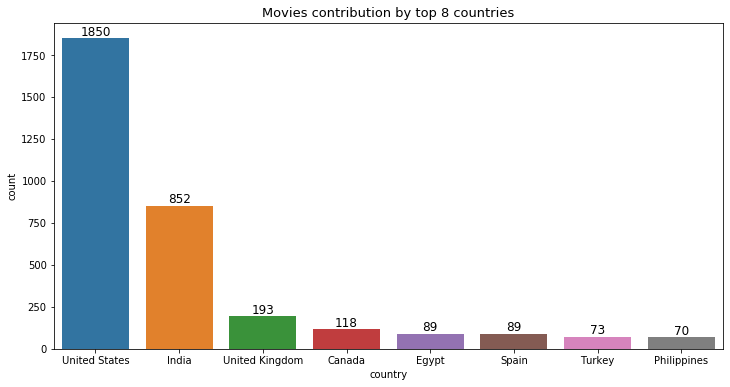

In [58]:
#Movies contribution by country (Top 8)
figure = plt.figure(figsize=(12,6))
sns.countplot(x="country",data=movies,order = movies['country'].value_counts().index[0:8] )
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('Movies contribution by top 8 countries',size='13')
plt.show()

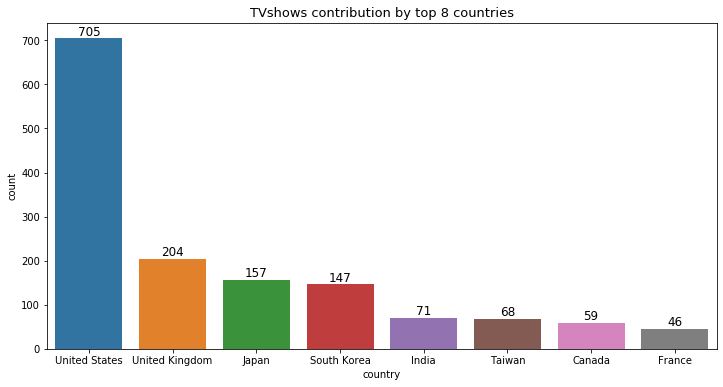

In [59]:
#TVshows contribution by top 8 countries
figure = plt.figure(figsize=(12,6))
sns.countplot(x="country",data=tvshows,order = tvshows['country'].value_counts().index[0:8] )
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('TVshows contribution by top 8 countries',size='13')
plt.show()

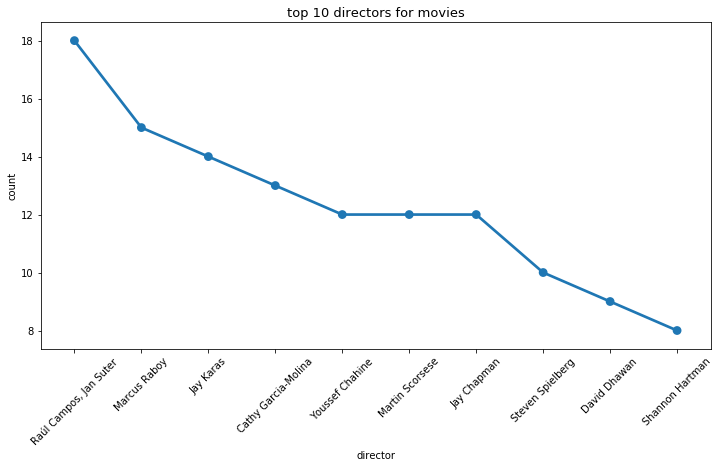

In [60]:
#top 10 directors for movies 
movie_directors = movies.groupby("director")["show_id"].count().reset_index(name="count").sort_values(by="count",ascending=False)
figure = plt.figure(figsize=(12,6))
sns.pointplot(x="director",y="count",data=movie_directors.head(10) )
plt.xticks(rotation=45)
plt.title('top 10 directors for movies',size='13')
plt.show()


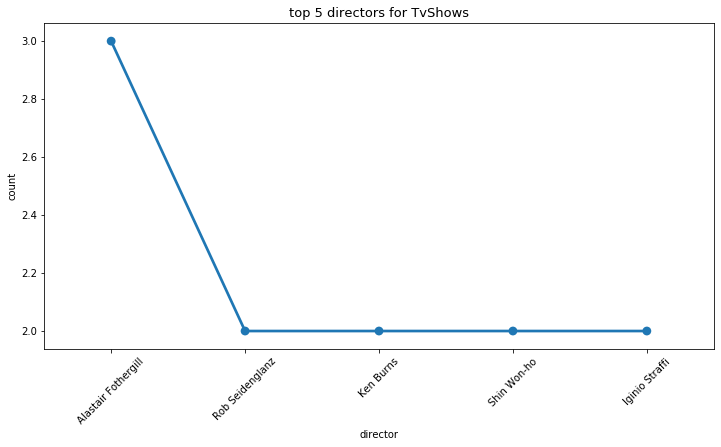

In [61]:
#top 5 directors for TvShows
tvshows_directors = tvshows.groupby("director")["show_id"].count().reset_index(name="count").sort_values(by="count",ascending=False)
figure = plt.figure(figsize=(12,6))
sns.pointplot(x="director",y="count",data=tvshows_directors.head(5) )
plt.xticks(rotation=45)
plt.title('top 5 directors for TvShows',size='13')
plt.show()

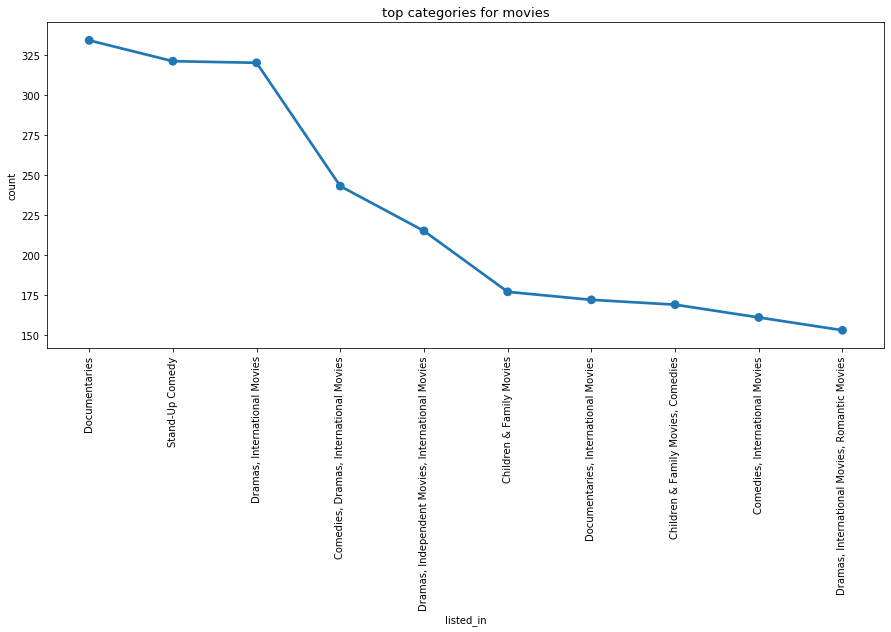

In [62]:
#top categories for movies
movie_category = movies.groupby("listed_in")["show_id"].count().reset_index(name="count").sort_values(by="count",ascending=False)
figure = plt.figure(figsize=(15,6))
sns.pointplot(x="listed_in",y="count",data=movie_category.head(10) )
plt.xticks(rotation=90)
plt.title('top categories for movies',size='13')
plt.show()

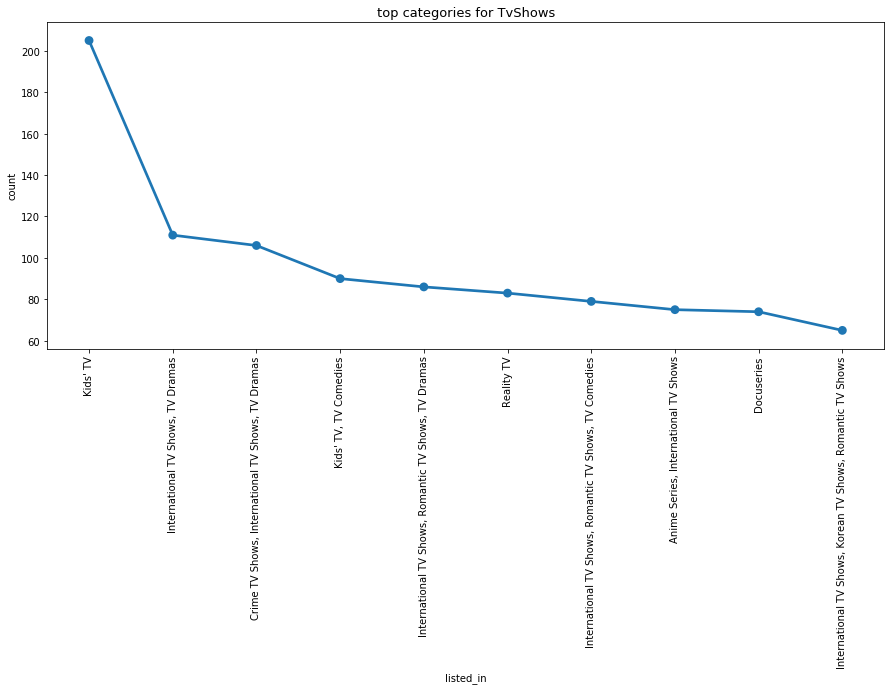

In [63]:
#top categories for TvShows
tvshows_category = tvshows.groupby("listed_in")["show_id"].count().reset_index(name="count").sort_values(by="count",ascending=False)
figure = plt.figure(figsize=(15,6))
sns.pointplot(x="listed_in",y="count",data=tvshows_category.head(10) )
plt.xticks(rotation=90)
plt.title('top categories for TvShows',size='13')
plt.show()

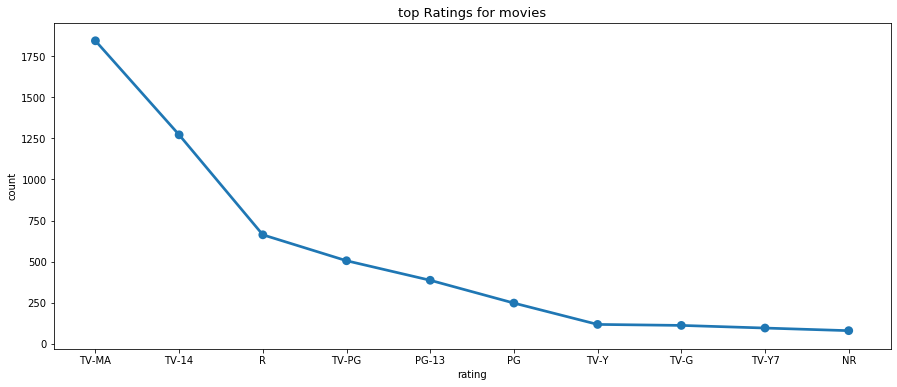

In [64]:
#top Ratings for movies
movies_rating = movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
figure = plt.figure(figsize=(15,6))
sns.pointplot(x="rating",y="count",data=movies_rating.head(10) )
plt.title('top Ratings for movies',size='13')
plt.show()

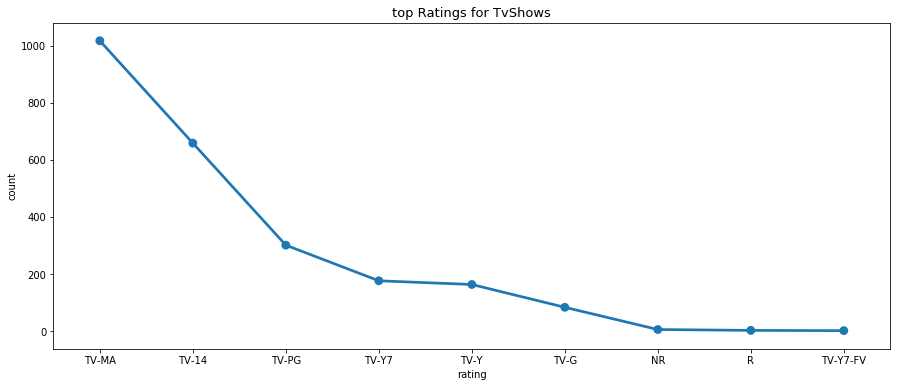

In [65]:
#top Ratings for TvShows
tvshows_rating = tvshows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
figure = plt.figure(figsize=(15,6))
sns.pointplot(x="rating",y="count",data=tvshows_rating.head(10) )
plt.title('top Ratings for TvShows',size='13')
plt.show()

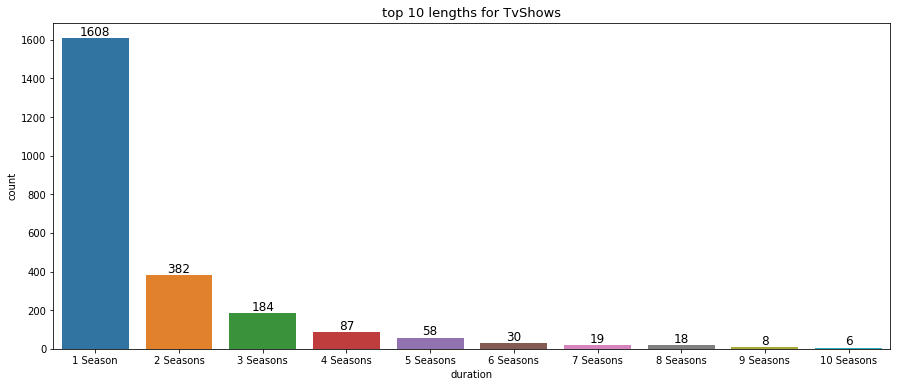

In [66]:
#top 10 duration period for Tvshows
durationoftvshows = tvshows.groupby("duration")["show_id"].count().reset_index(name="count").sort_values(by="count",ascending=False)
figure = plt.figure(figsize=(15,6))
sns.barplot(x="duration",y="count",data=durationoftvshows.head(10))
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('top 10 lengths for TvShows',size='13')
plt.show()

In [67]:
# EDA for USA only, create dataframe for USA

netflixUSA = data[data["country"] == "United States"]

In [68]:
netflixUSA.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",2019,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...


In [69]:
# create movies and tvshows dataframes for USA
moviesusa = netflixUSA[netflixUSA['type'] == 'Movie']
tvshowsusa= netflixUSA[netflixUSA['type'] == 'TV Show']

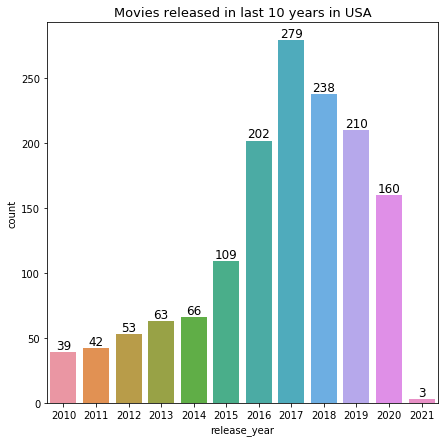

In [70]:
#Movies released in last 10 years in USA
moviesusa2010to2020 = moviesusa[moviesusa['release_year'] >= 2010]
figure = plt.figure(figsize=(7,7))
sns.countplot(x="release_year",data=moviesusa2010to2020)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('Movies released in last 10 years in USA',size='13')
plt.show()

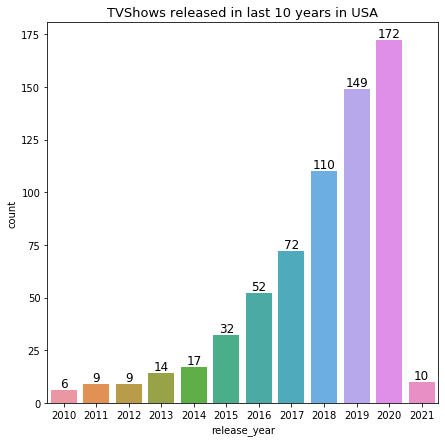

In [71]:
#TVshows released in last 10 years in USA
tvshowsusa2010to2020 = tvshowsusa[tvshowsusa['release_year'] >= 2010]
figure = plt.figure(figsize=(7,7))
sns.countplot(x="release_year",data=tvshowsusa2010to2020)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('TVShows released in last 10 years in USA',size='13')
plt.show()

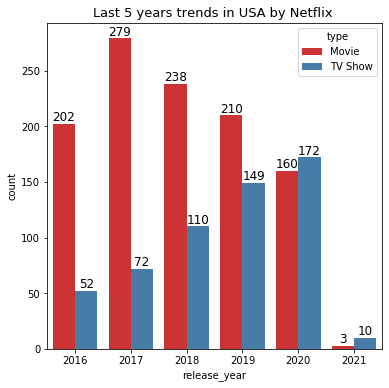

In [72]:
#Last 5 years Trends in USA Netflix for movies and tvshows
usa_recent5years = netflixUSA[netflixUSA["release_year"] >= 2016]
figure = plt.figure(figsize=(6,6))


sns.countplot(x="release_year",hue = "type",data = usa_recent5years,palette="Set1")
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('Last 5 years trends in USA by Netflix ',size='13')
plt.show()

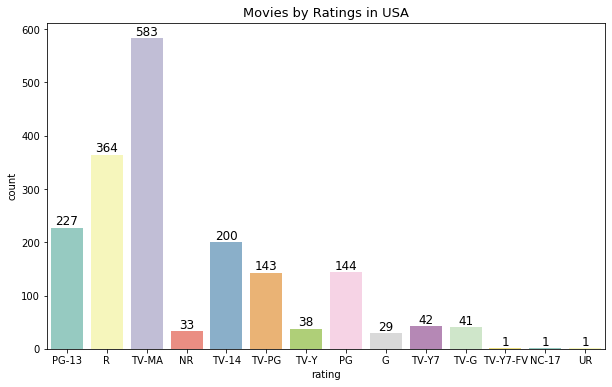

In [73]:
#movies by rating in USA
figure = plt.figure(figsize=(10,6))
sns.countplot(x="rating",data = moviesusa,palette="Set3")
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('Movies by Ratings in USA',size='13')
plt.show()

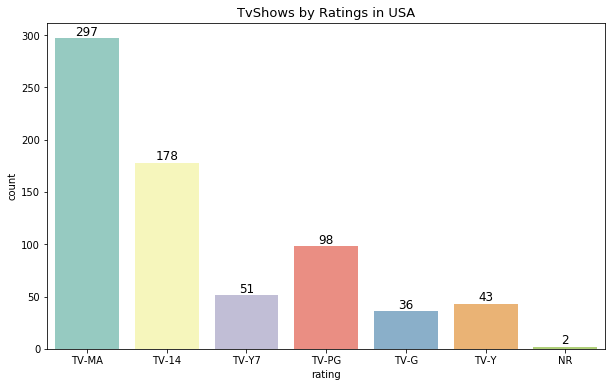

In [74]:
#TV shows by ratings in USA
figure = plt.figure(figsize=(10,6))
sns.countplot(x="rating",data = tvshowsusa,palette="Set3")
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('TvShows by Ratings in USA',size='13')
plt.show()